<a href="https://colab.research.google.com/github/alexa21e/cifar10-image-classification/blob/master/Deep_Learning_CIFAR10_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First you need the run the code cell below to get

In [1]:
import os
import sys

GITHUB_REPO_URL = "https://github.com/alexa21e/cifar10-image-classification"
REPO_NAME = "cifar10-image-classification"

if not os.path.exists(REPO_NAME):
    print(f"Cloning repo {GITHUB_REPO_URL}...")
    !git clone {GITHUB_REPO_URL}
else:
    print("The repo exists locally, it just needs updating")
    %cd {REPO_NAME}
    !git pull
    %cd ..

os.chdir(os.path.join('/content', REPO_NAME))

# required_packages contains libraries for the model
if os.path.exists('required_packages.txt'):
    !pip install -r required_packages.txt
else:
    print("The file 'required_packages.txt' does not exist")

print("\nFinalized installing stage")

try:
    from train_utils import load_and_preprocess_cifar10, create_baseline_cnn
except ImportError as e:
    print(f"Couldn't find trains_utils.py")
    raise

(features_train, labels_train), (features_test, labels_test) = load_and_preprocess_cifar10()

baseline_model = create_baseline_cnn()

baseline_model.summary()

print("\nFinalized loading stage")

Cloning repo https://github.com/alexa21e/cifar10-image-classification...
Cloning into 'cifar10-image-classification'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 51 (delta 17), reused 31 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 2.64 MiB | 7.93 MiB/s, done.
Resolving deltas: 100% (17/17), done.

Finalized installing stage
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)


Finalized loading stage


Now that the dataset has been loaded and the model has been created in the above cell, the model can start its training by running the below cell

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = baseline_model.fit(
    # ARGUMENT 1: the input data (the images) the model will learn patterns from
    features_train,

    # ARGUMENT 2: the expected output (labels) the model aims to predict correctly
    labels_train,

    # ARGUMENT 3: epochs are the number of times the model will iterate over the
    # training dataset, repetitiveness  usually leads to better learning
    epochs=20,

    # ARGUMENT 4: batch_size is the number of samples processed before the model's
    # internal weights are updated, a larger batch size uses the GPU memory efficiently
    batch_size=128,

    # ARGUMENT 5: provides the model with a separate dataset made of both images
    # and labels to evaluate its performance after each epoch
    # this step can detect overfitting which appears when validation accuracy
    # stops increasing
    validation_data=(features_test, labels_test),

    callbacks=[early_stopping],

    # ARGUMENT 6: controls the amount of logs during training, has values 0, 1 or 2
    verbose=1
)

print("Finalized training")

loss, acc = baseline_model.evaluate(features_test, labels_test, verbose=0)
print(f"Accuracy on test training set: {acc*100:.2f}%")

drive_save_path = os.path.join(DRIVE_PROJECT_ROOT, 'baseline_cnn_weights.keras')
baseline_model.save(drive_save_path)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7320 - loss: 0.7628 - val_accuracy: 0.7528 - val_loss: 0.7319
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7324 - loss: 0.7624 - val_accuracy: 0.7559 - val_loss: 0.6990
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7378 - loss: 0.7508 - val_accuracy: 0.7516 - val_loss: 0.7137
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7414 - loss: 0.7351 - val_accuracy: 0.7498 - val_loss: 0.7074
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7406 - loss: 0.7480 - val_accuracy: 0.7612 - val_loss: 0.6858
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7500 - loss: 0.7200 - val_accuracy: 0.7668 - val_loss: 0.6786
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7455 - loss: 0.7179 - val_accuracy: 0.7622 - val_loss: 0.6866
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7502 - loss: 0.7174 - val_accuracy: 0.

Besides the accuracy logged after training the model, we can visualize the accuracy and the loss acheived on each epoch through the diagrams outputed below

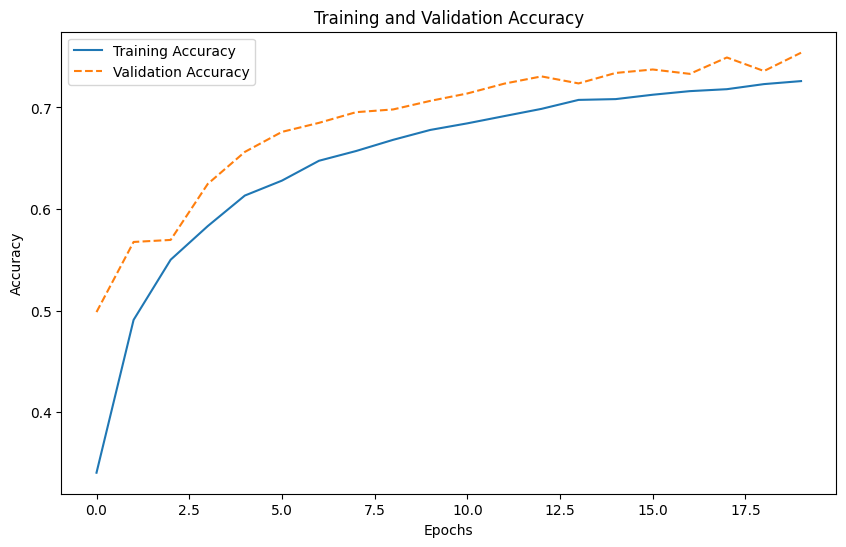

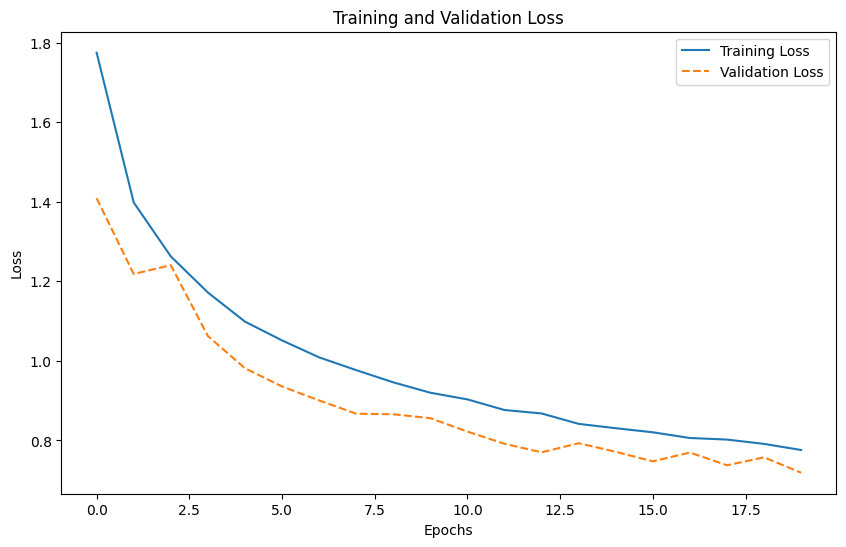

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], linestyle='--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], linestyle='--', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()